In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import json

This code takes a csv of observed points and a csv make from a .shp shapefiles. 
it will plot them together and make a json file compatible with Plouf C code. 

In [3]:
def plot_line_and_polygon(shape: pd.DataFrame, points: pd.DataFrame = None) -> None:
    fig, ax = plt.subplots(figsize=(9,13))

    if points is not None:
        ax.plot(points.Easting,points.Northing,color='red',markersize=3,label='Observed Data')
        
    ax.plot(shape.Easting,shape.Northing,linestyle='dashed',color='black',label='Magnetic Body')
    ax.scatter(shape.Easting,shape.Northing,color='blue',label='Verticies')

    ax.legend(loc='upper right')
    plt.savefig('./shape.png')

In [4]:
def save_json(all_shapes, filename="./data/shape_data.json"):
    """Save the coordinates of multiple shapes to a JSON file."""
    json_data = {"shapes": all_shapes}
    
    # Serializing json
    json_object = json.dumps(json_data, indent=4)
    
    # Writing to a JSON file
    with open(filename, "w") as outfile:
        outfile.write(json_object)

    print('json saved to: {}\n'.format(outfile.name))

In [21]:
pts = pd.read_csv("/home/jovyan/Cproject/data/observed_data/points_anom_a_cone_1.txt",usecols=[0,1,2],header=None,sep='[\\s,]',names=['Easting','Northing','Mag'],engine='python')
print('\nFile head: \n',pts.head())


File head: 
     Easting   Northing      Mag
0  545103.0  4054055.0  50550.0
1  545105.0  4054054.0  50561.0
2  545106.0  4054053.0  50554.0
3  545108.0  4054052.0  50555.0
4  545108.0  4054052.0  50554.0


In [22]:
shape = pd.read_csv('/home/jovyan/Cproject/data/shape_data/shp_shapefiles/anom_a_cone_1.csv',skiprows=1,usecols=[0,1],sep='[\\s,]',names=['Easting','Northing'],engine='python')
print('\nFile head: \n',shape.head())


File head: 
          Easting      Northing
0  546367.791756  4.055333e+06
1  546489.084860  4.055303e+06
2  546489.084860  4.055303e+06
3  546549.731412  4.055139e+06
4  546537.602101  4.054860e+06


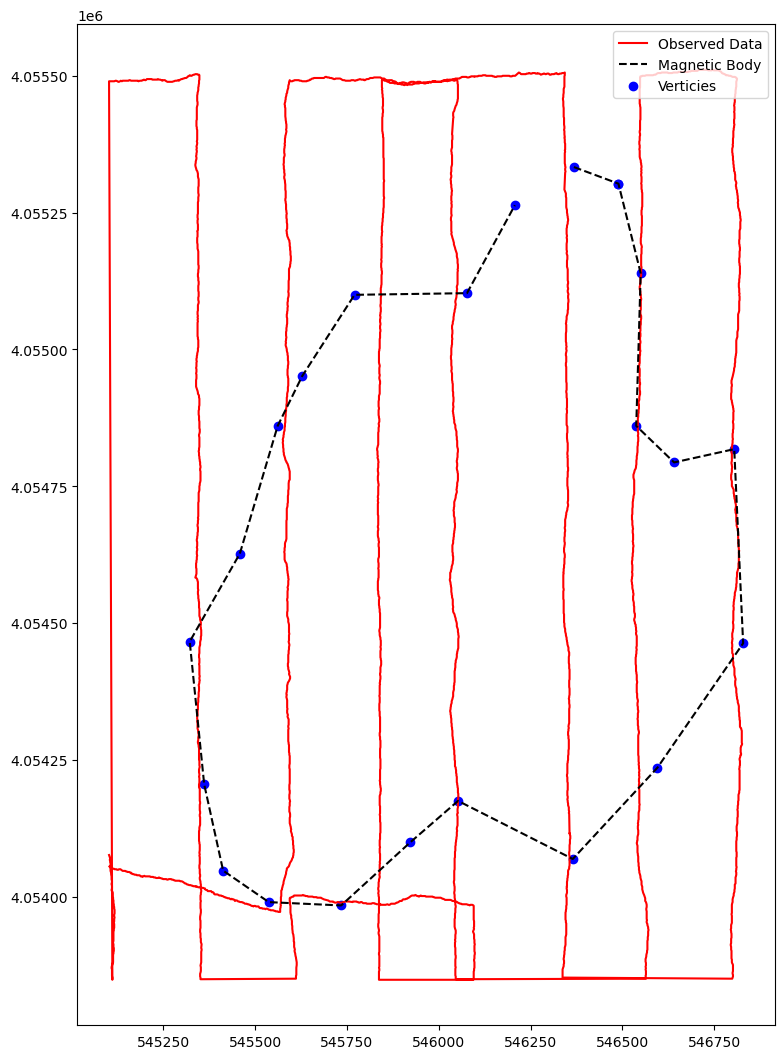

In [23]:
plot_line_and_polygon(shape=shape,points=pts)

In [35]:
all_shapes = []  # List to hold all shape data

#assuming single shape
shape_data = {
    'name': f"shape 1",
    'x': shape.Easting.to_list(),
    'y': shape.Northing.to_list(),
    'magnetic_inclination': -47,
    'magnetic_declination': 180,
    'magnetic_intensity': 20,
    'top': 50,
    'bottom': 150
}

all_shapes.append(shape_data)

# Save all shapes data to JSON
save_json(all_shapes,filename='/home/jovyan/Cproject/data/shape_data/anom_a_prism1_shape.json')

json saved to: /home/jovyan/Cproject/data/shape_data/anom_a_prism1_shape.json



In [36]:
all_shapes[0]

{'name': 'shape 1',
 'x': [546367.791756466,
  546489.084859914,
  546489.084859914,
  546549.731411638,
  546537.602101293,
  546640.701239224,
  546804.446928879,
  546828.705549569,
  546595.216325431,
  546364.759428879,
  546052.4296875,
  545922.039601293,
  545734.035290948,
  545536.933997845,
  545412.60856681,
  545361.058997845,
  545321.638739224,
  545458.093480604,
  545561.192618535,
  545627.903825431,
  545770.423221983,
  546076.68830819,
  546207.078394397],
 'y': [4055333.23154634,
  4055302.90827047,
  4055302.90827047,
  4055139.16258082,
  4054860.18844289,
  4054793.47723599,
  4054817.73585668,
  4054462.9535291,
  4054235.52896013,
  4054068.75094289,
  4054174.88240841,
  4054099.07421875,
  4053983.84577047,
  4053989.91042565,
  4054047.52464978,
  4054205.20568427,
  4054465.98585668,
  4054626.69921875,
  4054860.18844289,
  4054951.15827047,
  4055099.7423222,
  4055102.77464978,
  4055263.48801185],
 'magnetic_inclination': -47,
 'magnetic_declination':